<a href="https://colab.research.google.com/github/aimlresearcher/AI-COURSE/blob/main/04_DLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth-Limited Search (DLS)
- DLS is similar to DFS but with a depth limit.
- Nodes beyond the depth limit are not expanded.
- If the goal is found within the depth limit, DLS returns the path.
- If the goal is not found but there are deeper nodes, DLS returns "Cutoff".
- If the goal is not found and no further nodes exist, DLS returns "Failure".


In [20]:
# Iterative Depth-Limited Search (DLS) Implementation
def depth_limited_search(graph, start, goal, limit):
    stack = [(start, [start], 0)]  # (node, path, depth)
    visited = set()

    while stack:
        current, path, depth = stack.pop()
        visited.add(current)

        # If goal is found, return the path
        if current == goal:
            return path

        # If depth limit is reached, continue without exploring deeper
        if depth < limit:
            for neighbor in reversed(graph.get(current, [])):  # Reverse to maintain DFS order
                if neighbor not in visited and neighbor not in path:
                    stack.append((neighbor, path + [neighbor], depth + 1))

    return "Cutoff" if any(depth == limit for _, _, depth in stack) else None  # Return Cutoff or Failure


# Define the graph as an adjacency list
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']
}


In [21]:
# Define start, goal, and depth limit
start_node = "S"
goal_node = "A"
depth_limit = 1  # Adjust the depth limit

# Run DLS
dls_result = depth_limited_search(graph, start_node, goal_node, depth_limit)

# Print the result
if dls_result == "Cutoff":
    print("\nDLS Result: Cutoff (Goal may be at a deeper level)")
elif dls_result is None:
    print("\nDLS Result: Failure (Goal not found within the depth limit)")
else:
    print("\nDLS Path Found:", " → ".join(dls_result))



DLS Result: Failure (Goal not found within the depth limit)


In [22]:
# Define start, goal, and depth limit
start_node = "S"
goal_node = "A"
depth_limit = 2  # Adjust the depth limit

# Run DLS
dls_result = depth_limited_search(graph, start_node, goal_node, depth_limit)

# Print the result
if dls_result == "Cutoff":
    print("\nDLS Result: Cutoff (Goal may be at a deeper level)")
elif dls_result is None:
    print("\nDLS Result: Failure (Goal not found within the depth limit)")
else:
    print("\nDLS Path Found:", " → ".join(dls_result))



DLS Result: Failure (Goal not found within the depth limit)


In [23]:
# Define start, goal, and depth limit
start_node = "S"
goal_node = "A"
depth_limit = 3  # Adjust the depth limit

# Run DLS
dls_result = depth_limited_search(graph, start_node, goal_node, depth_limit)

# Print the result
if dls_result == "Cutoff":
    print("\nDLS Result: Cutoff (Goal may be at a deeper level)")
elif dls_result is None:
    print("\nDLS Result: Failure (Goal not found within the depth limit)")
else:
    print("\nDLS Path Found:", " → ".join(dls_result))



DLS Path Found: S → E → B → A


# Depth-Limited Search (DLS) With Networkx Library
- Current node being expanded (Red)
- Visited nodes (Blue)
- Nodes in the recursion stack (Green)
- Final path found (Highlighted in Red)

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Define the graph as an adjacency list
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']
}

# Create an undirected graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Function to draw the graph at each DLS step
def draw_graph(G, visited, stack, current, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Auto layout for positioning

    # Assign colors to nodes
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being expanded
        elif node in stack:
            node_colors.append('green')  # Nodes in recursion stack
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="black", width=1.5, font_size=10)

    # Highlight the final path in red if found
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title(f"Exploring: {current} | Stack: {list(stack)}\nVisited: {list(visited)}", fontsize=10)
    plt.show()
    time.sleep(1)  # Pause for better visualization

# Iterative Depth-Limited Search (DLS) function with visualization
def iterative_depth_limited_search(graph, start, goal, limit):
    stack = [(start, [start], 0)]  # (node, path, depth)
    visited = set()

    draw_graph(G, visited, [node for node, _, _ in stack], None)  # Initial state

    while stack:
        current, path, depth = stack.pop()
        visited.add(current)

        draw_graph(G, visited, [node for node, _, _ in stack], current)  # Draw after popping from stack

        if current == goal:
            draw_graph(G, visited, [], current, path)  # Highlight final path
            return path

        if depth < limit:  # Check depth limit
            for neighbor in reversed(graph.get(current, [])):  # Reverse for correct DFS order
                if neighbor not in path:  # Prevent cycles
                    stack.append((neighbor, path + [neighbor], depth + 1))

        draw_graph(G, visited, [node for node, _, _ in stack], current)  # Draw after adding neighbors

    return "Cutoff" if any(depth == limit for _, _, depth in stack) else None  # Return Cutoff or Failure



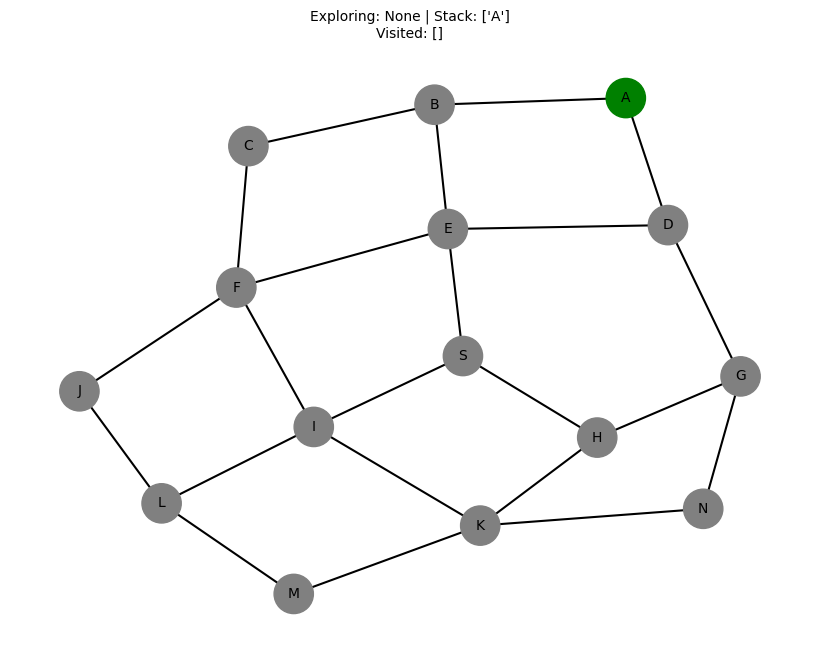

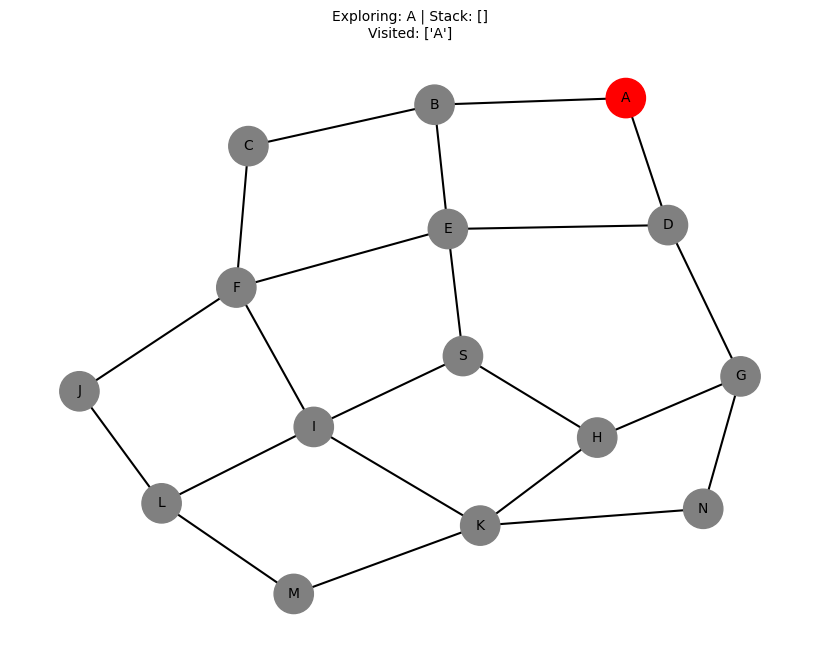

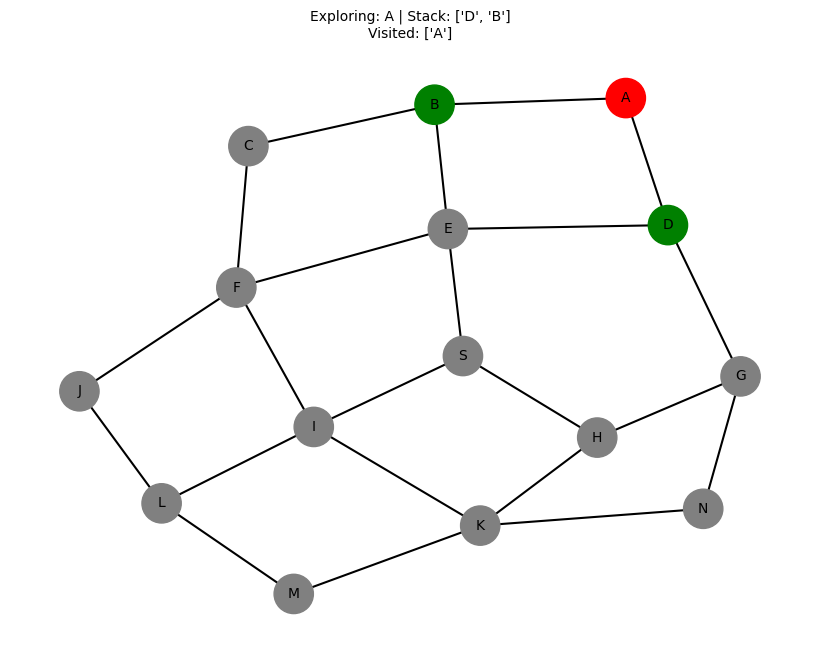

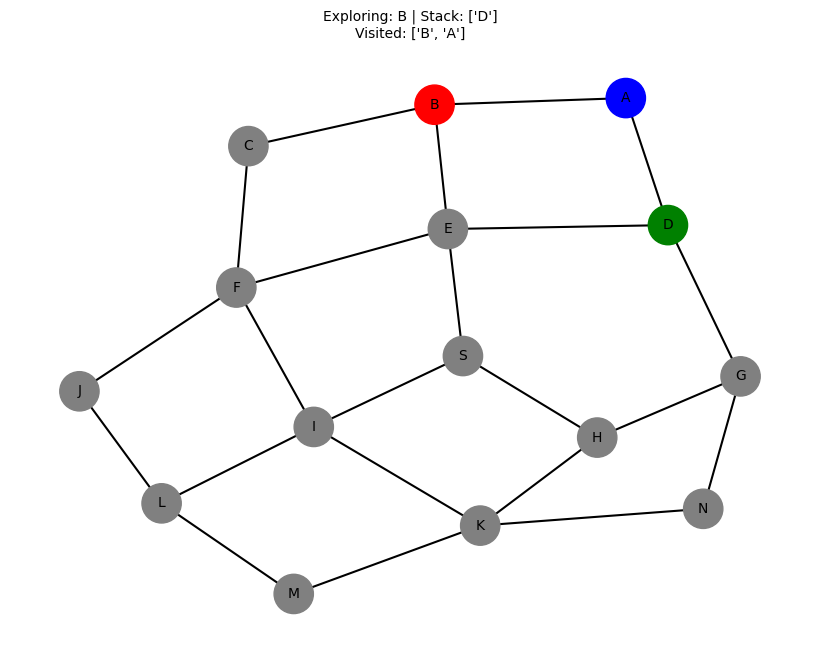

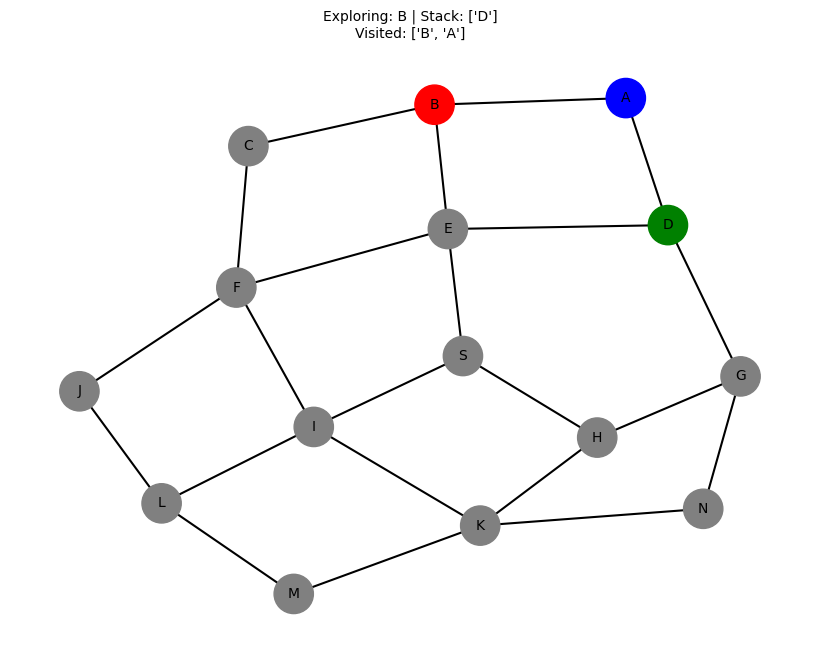

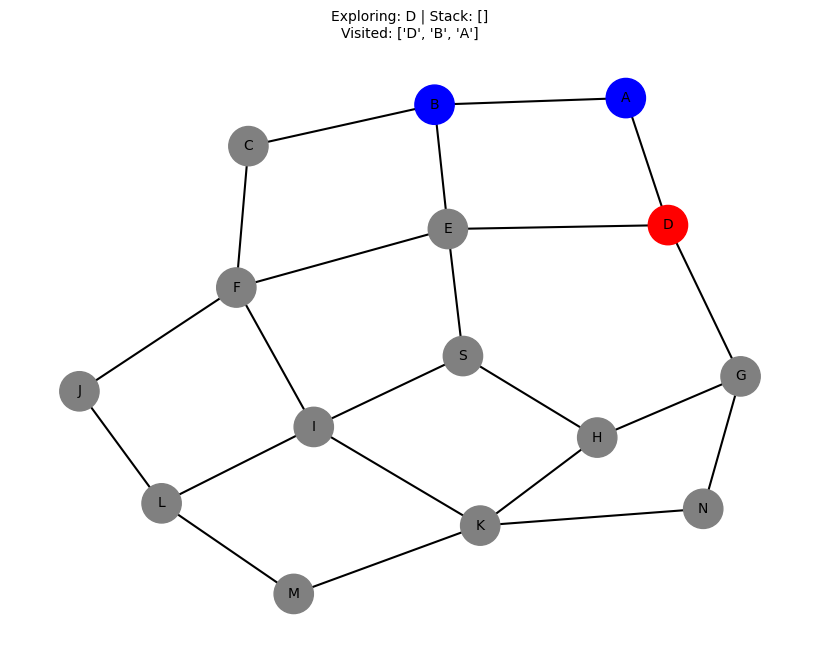

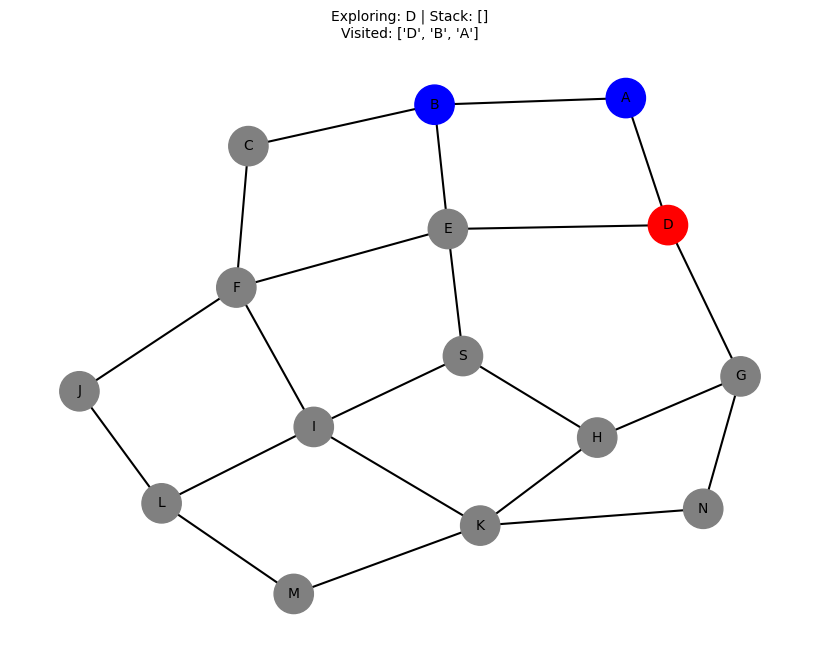


DLS Result: Failure (Goal not found within the depth limit)


In [16]:
# Define start, goal, and depth limit
start_node = "A"
goal_node = "H"
depth_limit = 1  # Adjust the depth limit

# Run Iterative DLS with Visualization
dls_result = iterative_depth_limited_search(graph, start_node, goal_node, depth_limit)

# Print the result
if dls_result == "Cutoff":
    print("\nDLS Result: Cutoff (Goal may be at a deeper level)")
elif dls_result is None:
    print("\nDLS Result: Failure (Goal not found within the depth limit)")
else:
    print("\nDLS Path Found:", " → ".join(dls_result))


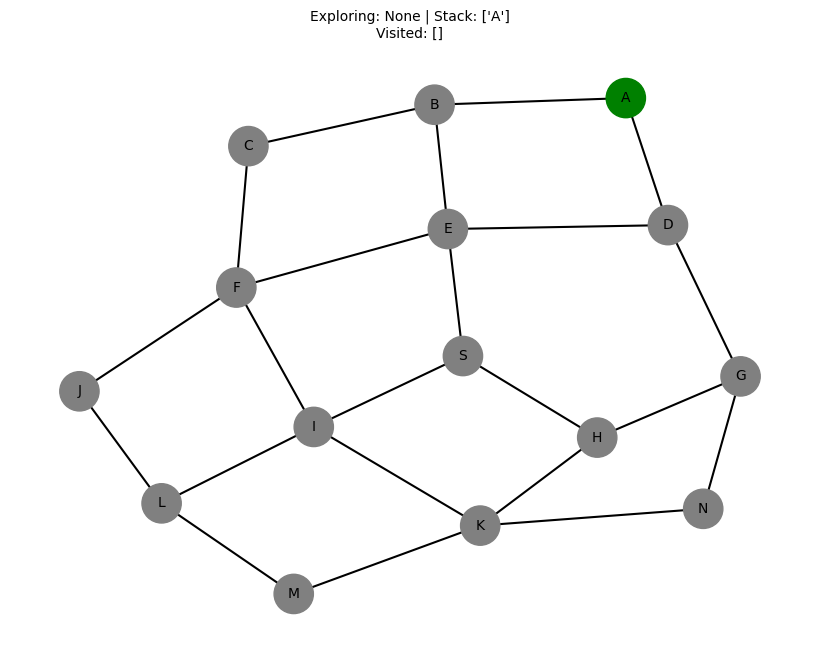

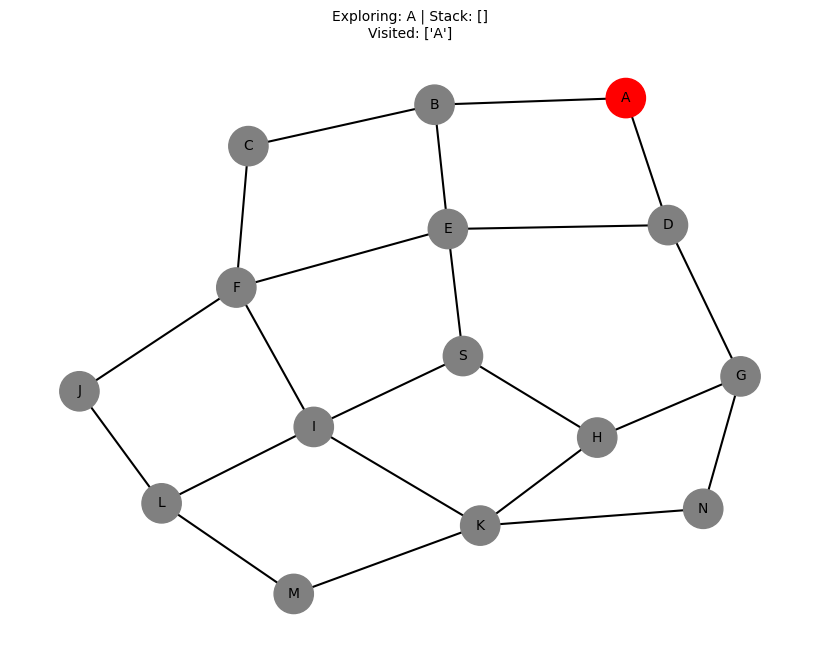

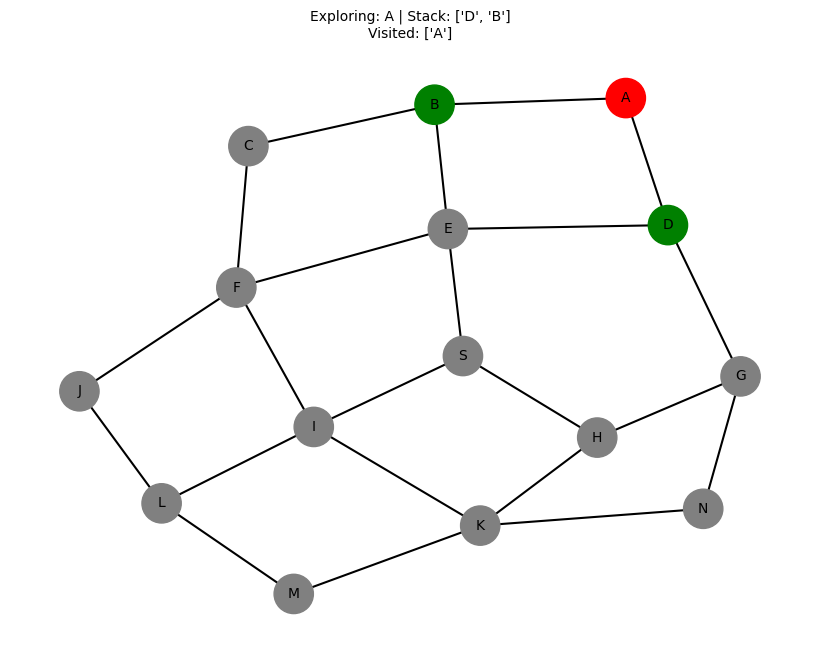

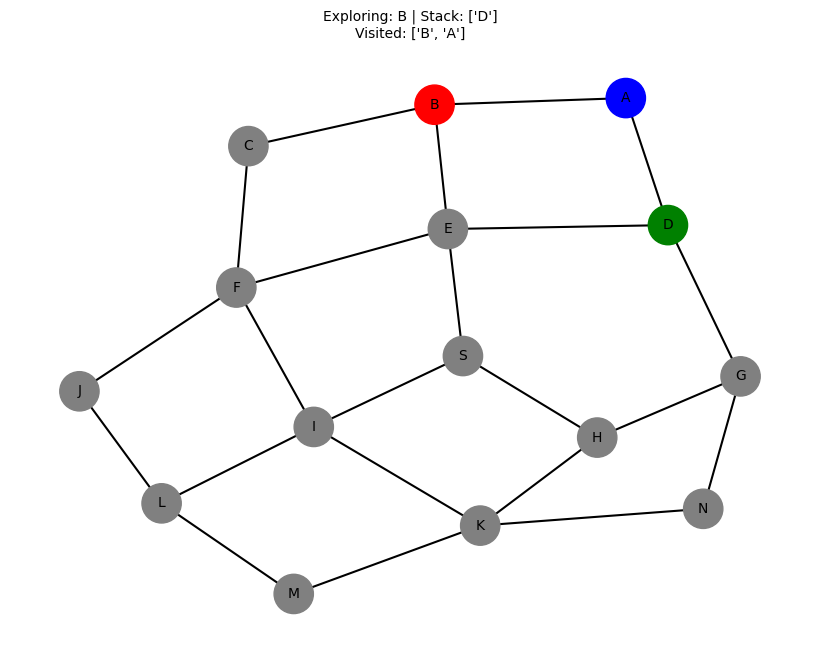

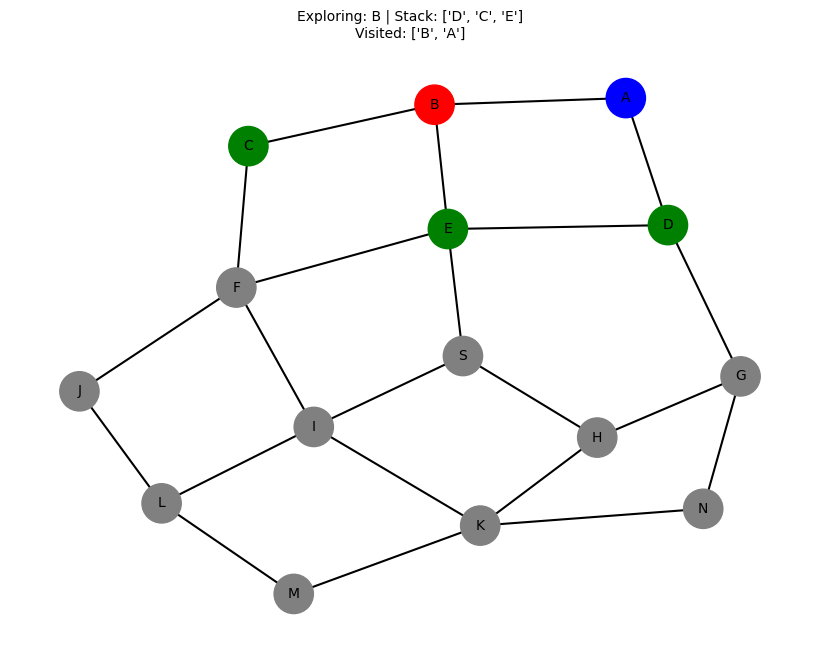

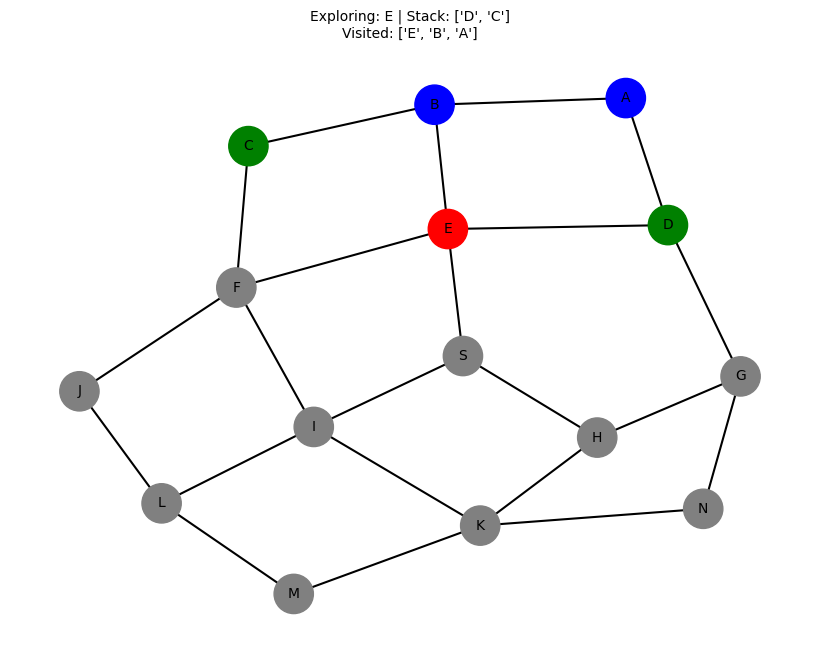

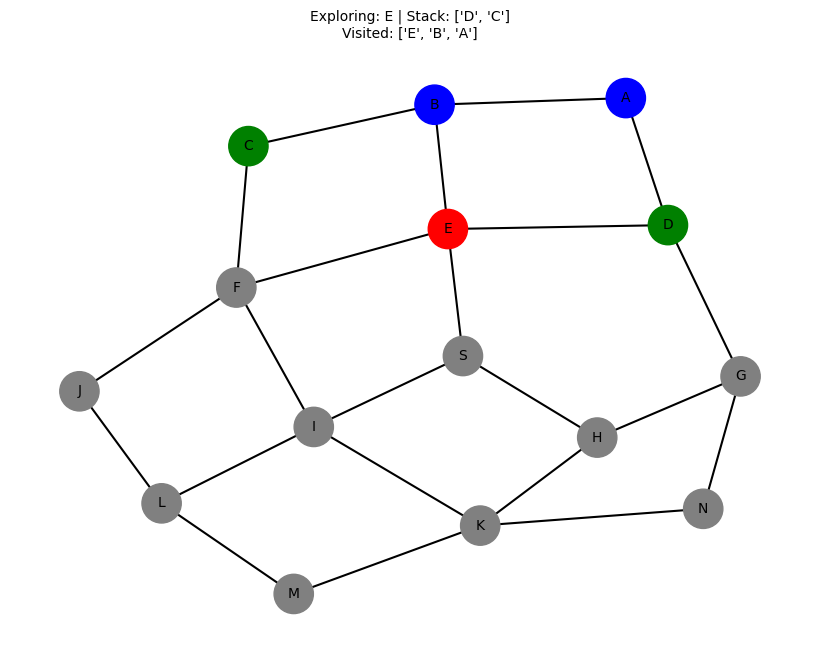

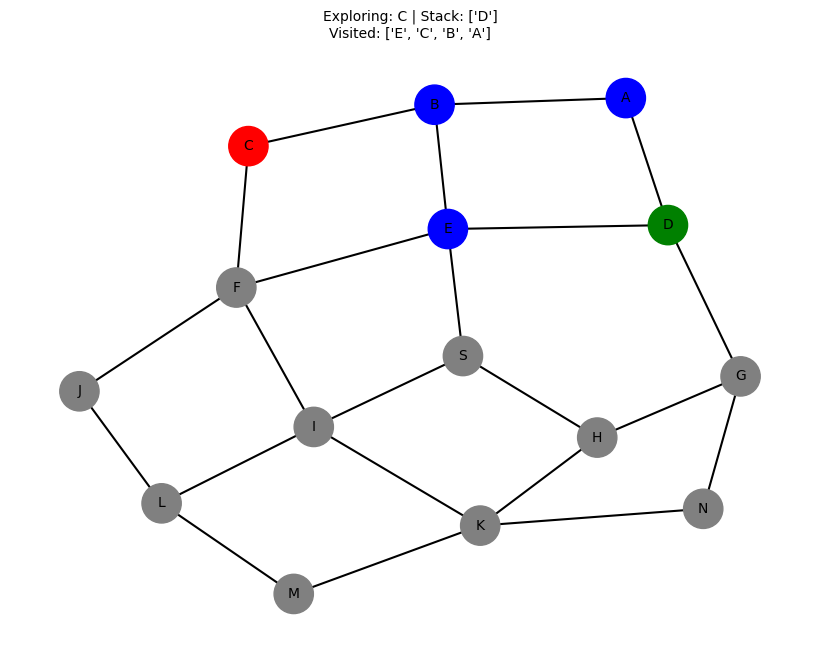

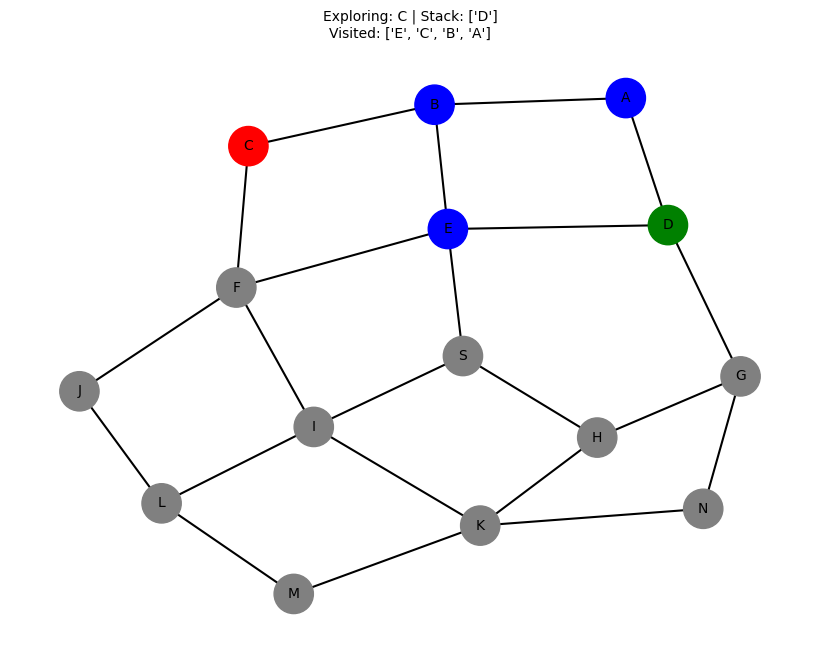

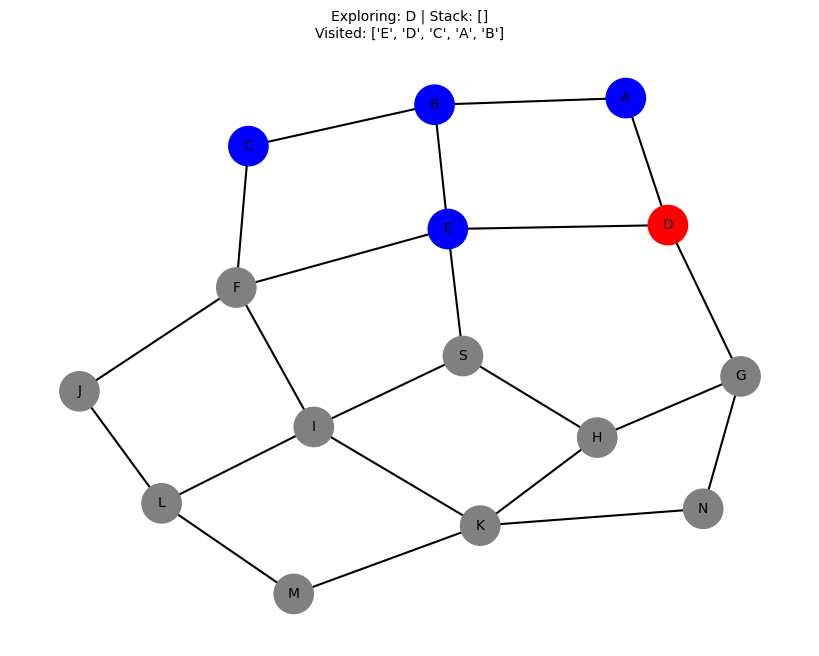

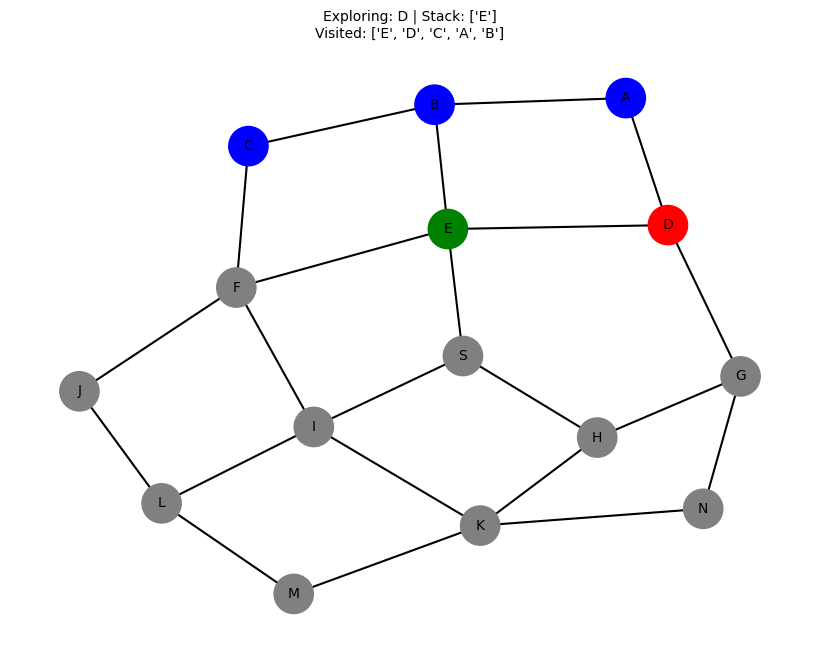

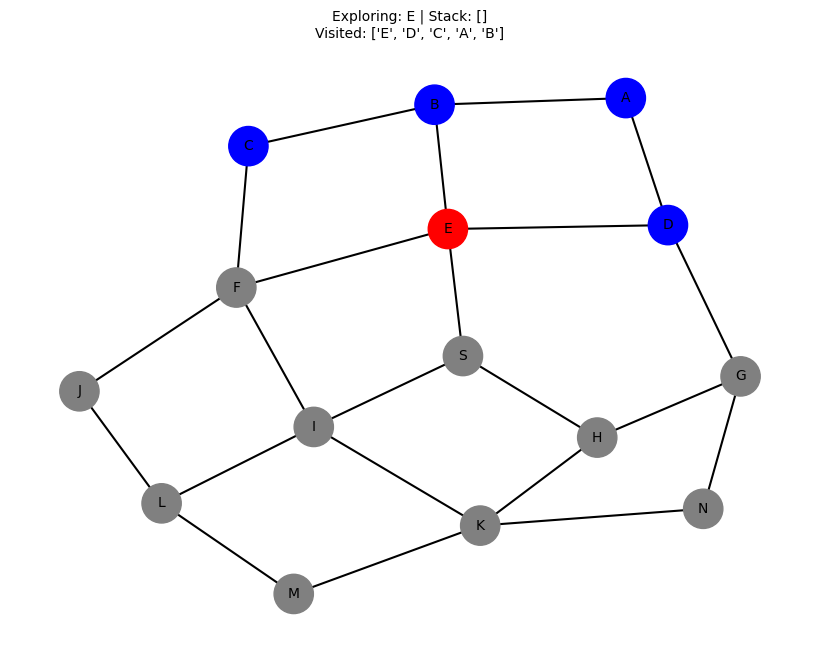

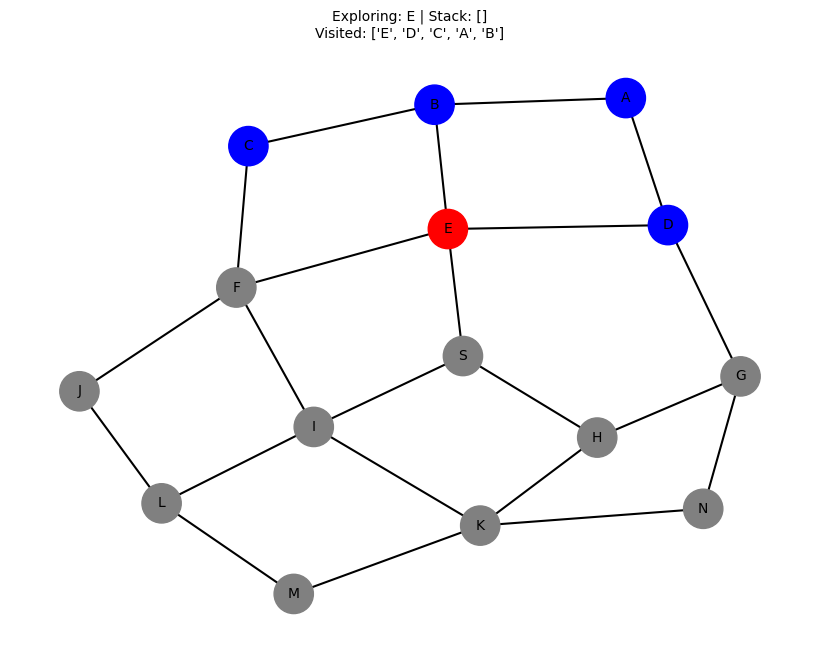


DLS Result: Failure (Goal not found within the depth limit)


In [17]:
# Define start, goal, and depth limit
start_node = "A"
goal_node = "H"
depth_limit = 2  # Adjust the depth limit

# Run Iterative DLS with Visualization
dls_result = iterative_depth_limited_search(graph, start_node, goal_node, depth_limit)

# Print the result
if dls_result == "Cutoff":
    print("\nDLS Result: Cutoff (Goal may be at a deeper level)")
elif dls_result is None:
    print("\nDLS Result: Failure (Goal not found within the depth limit)")
else:
    print("\nDLS Path Found:", " → ".join(dls_result))


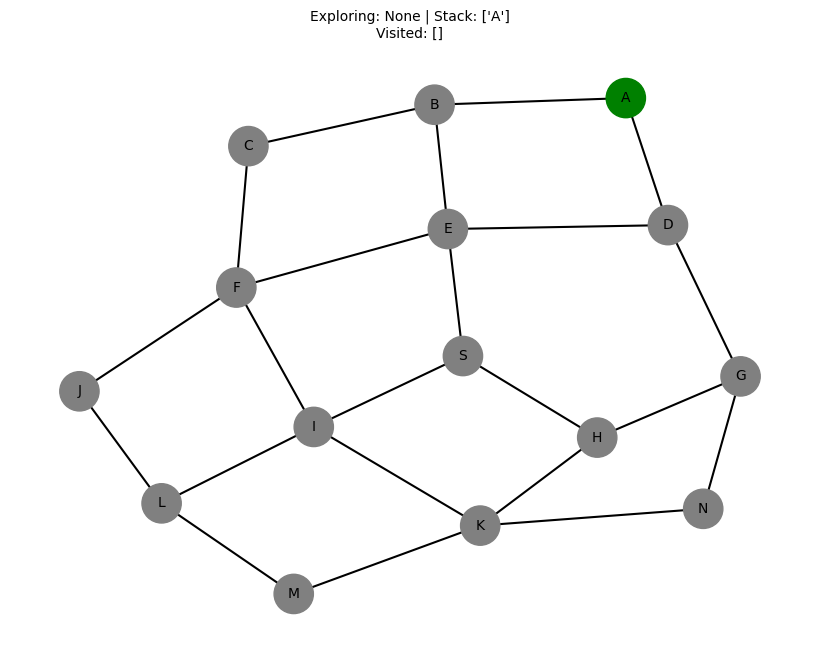

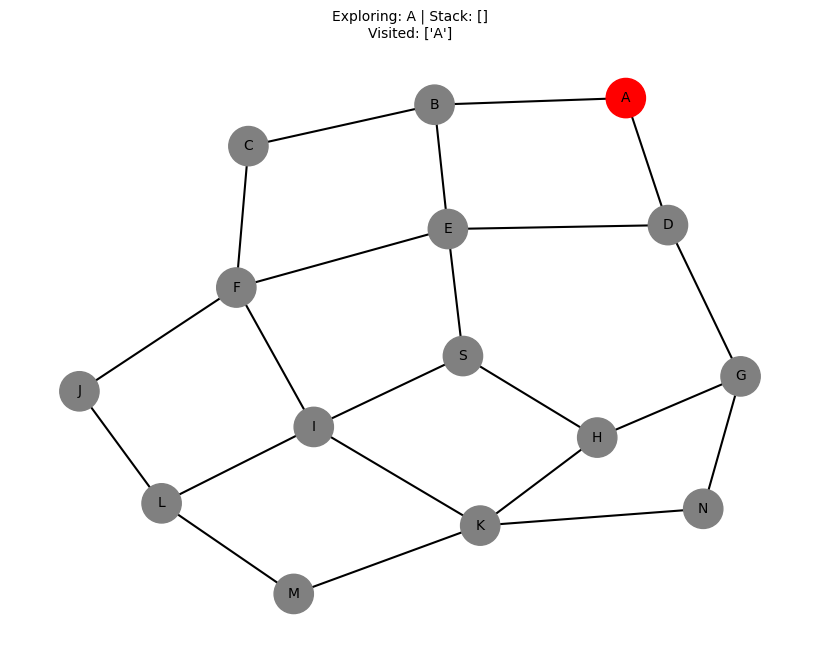

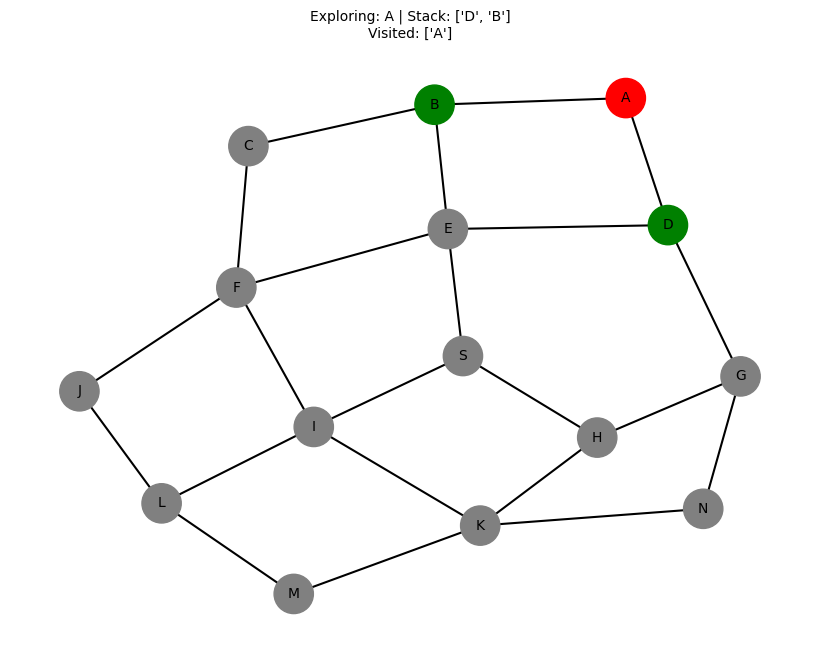

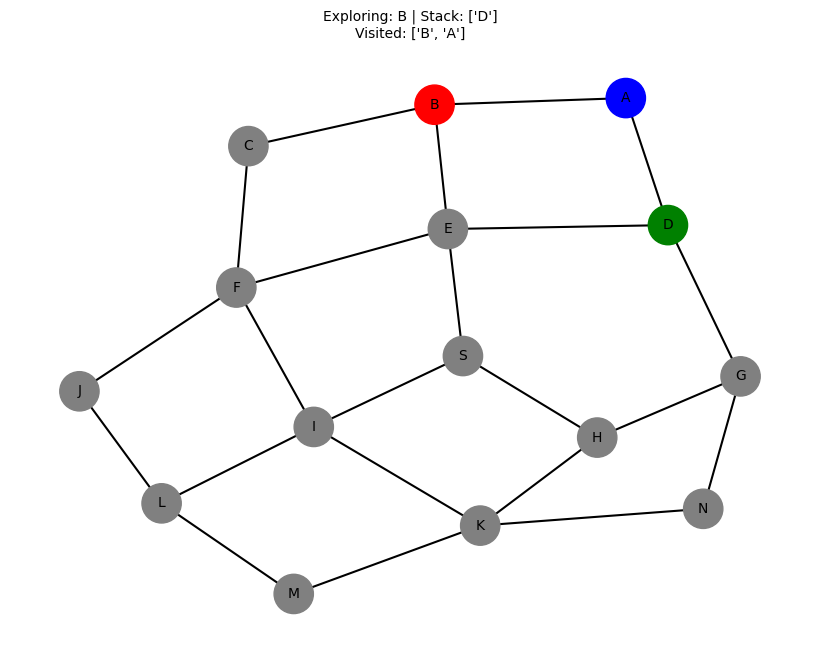

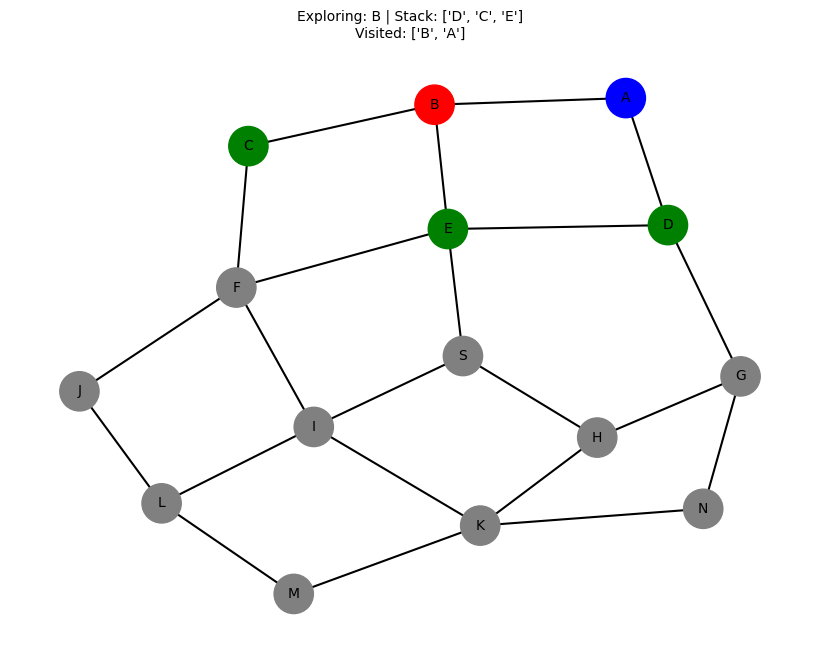

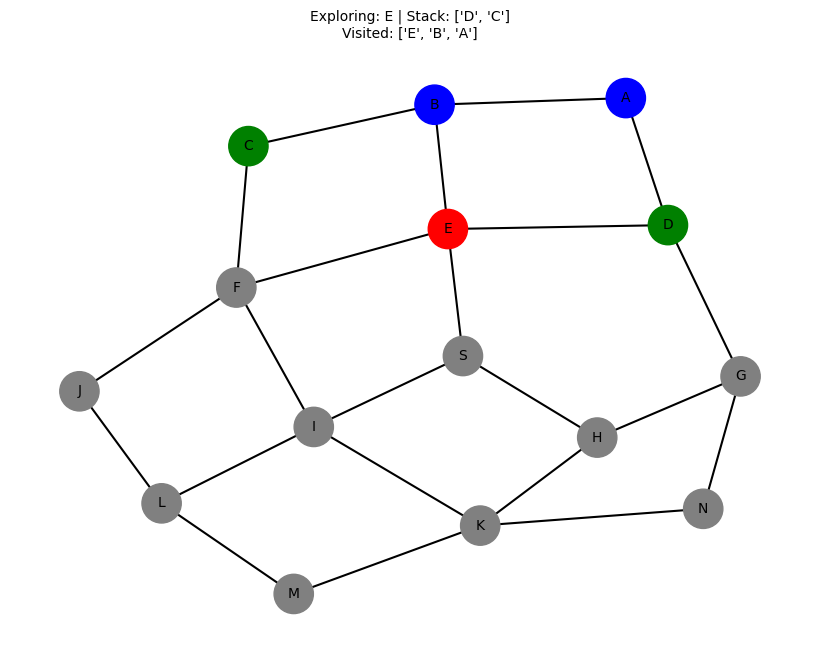

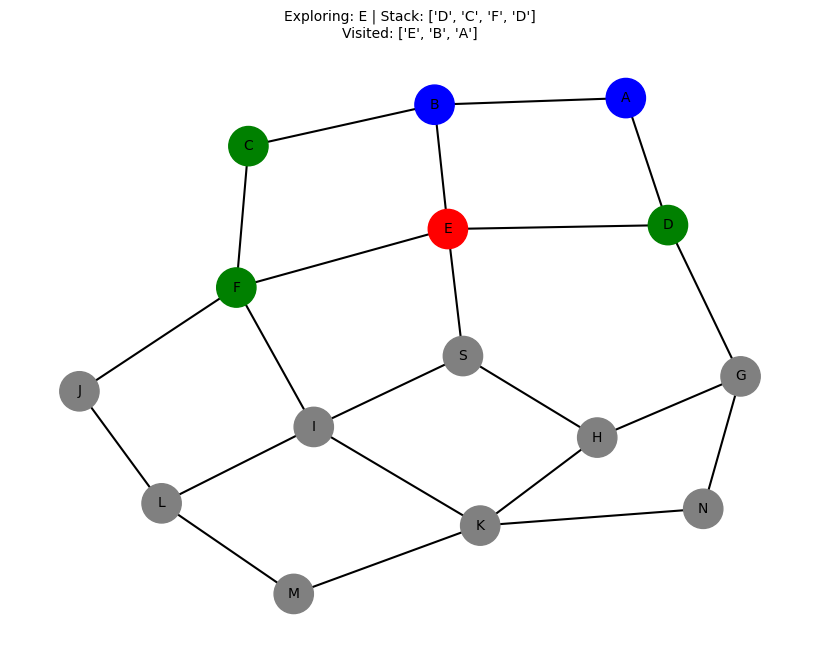

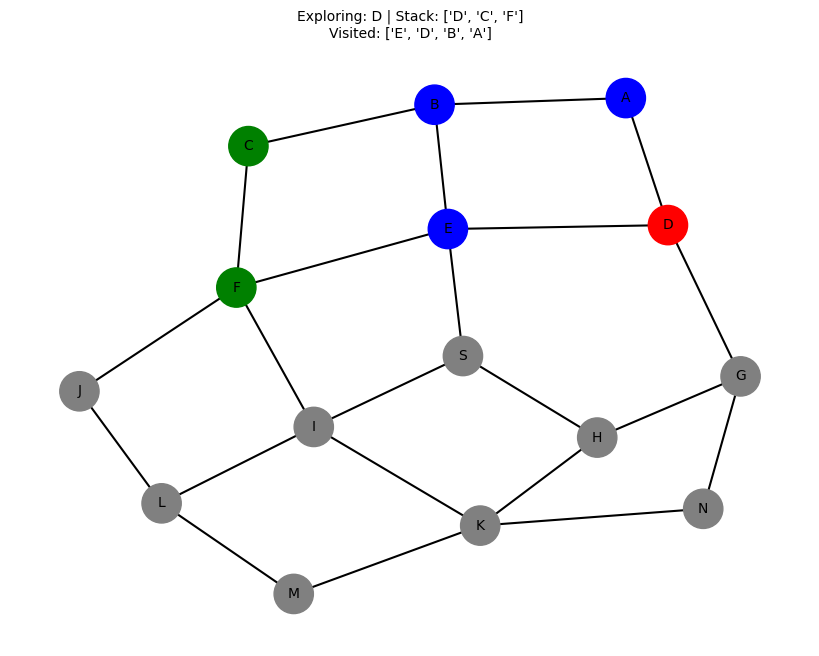

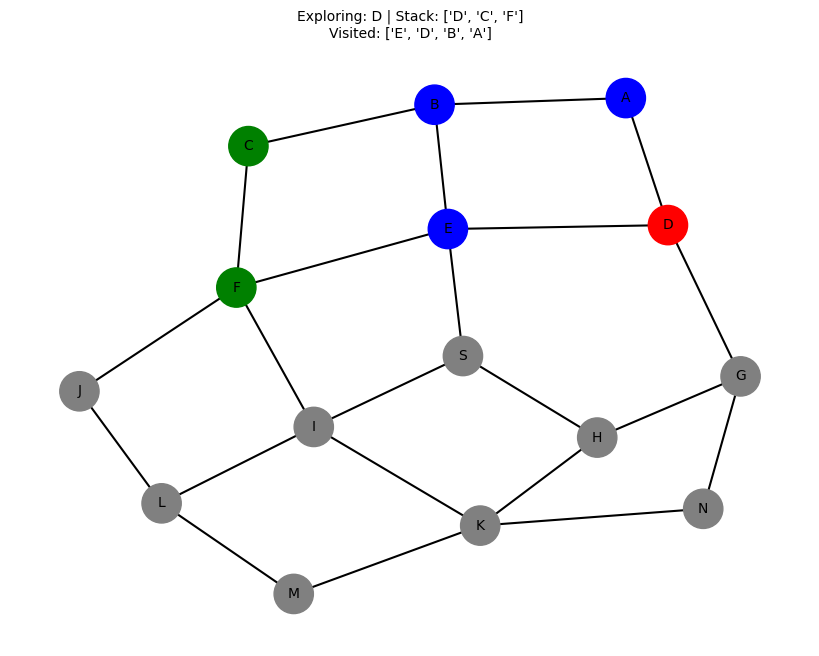

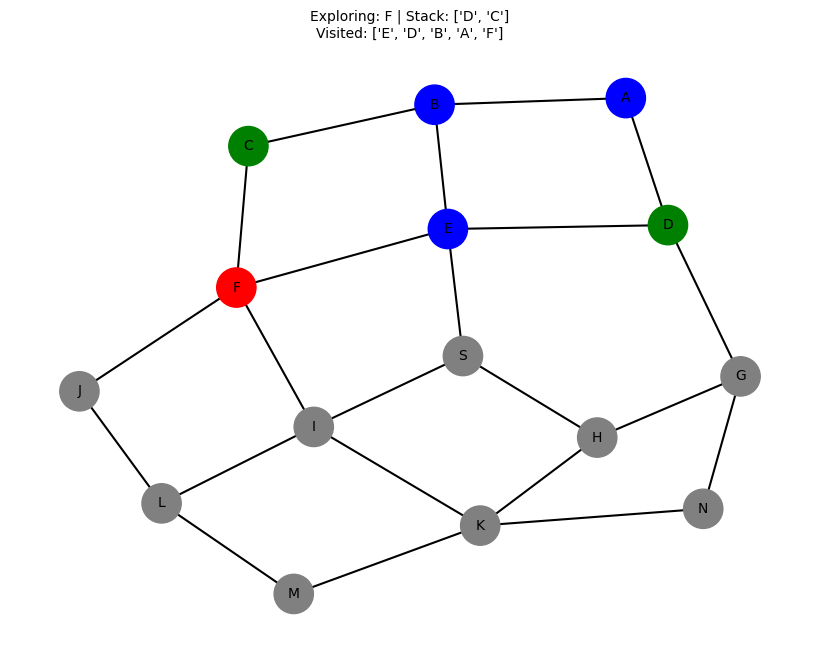

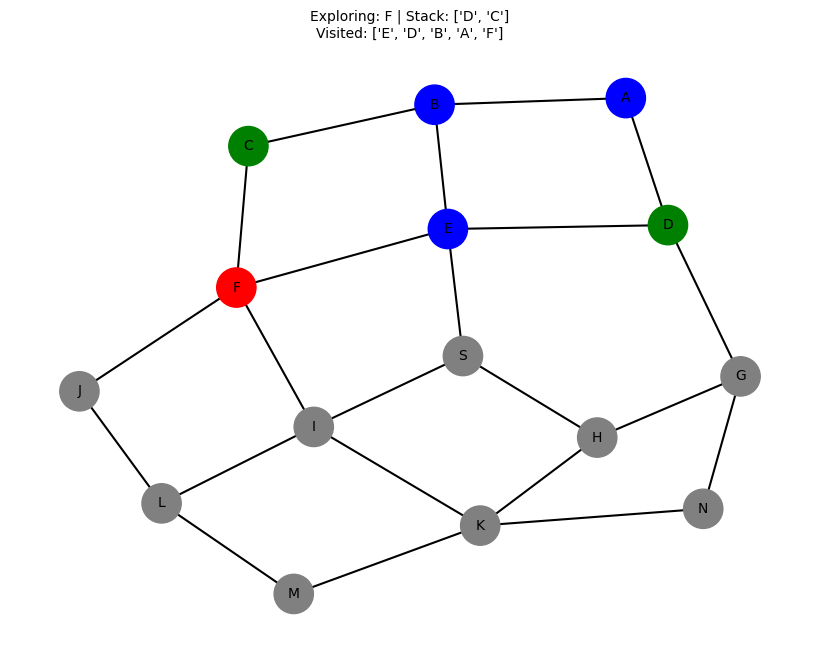

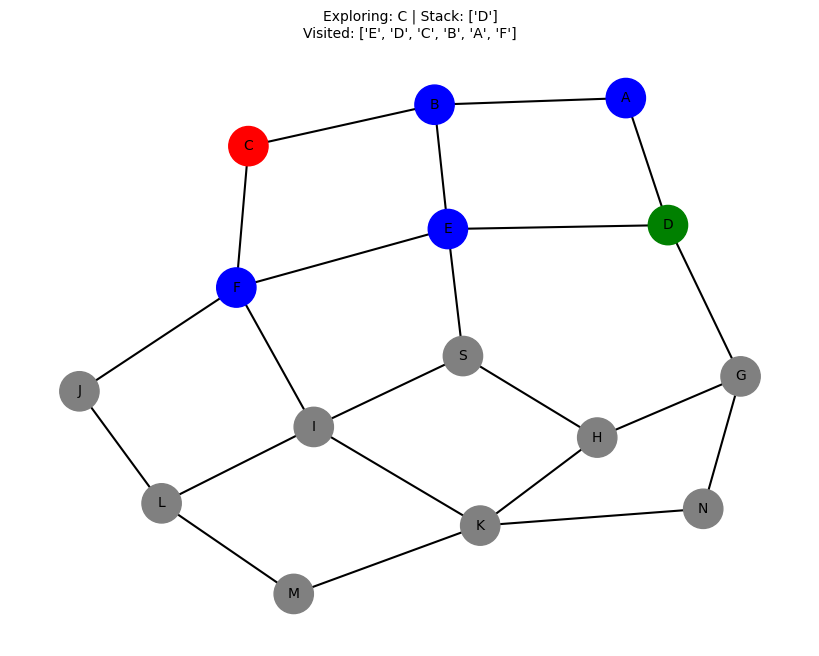

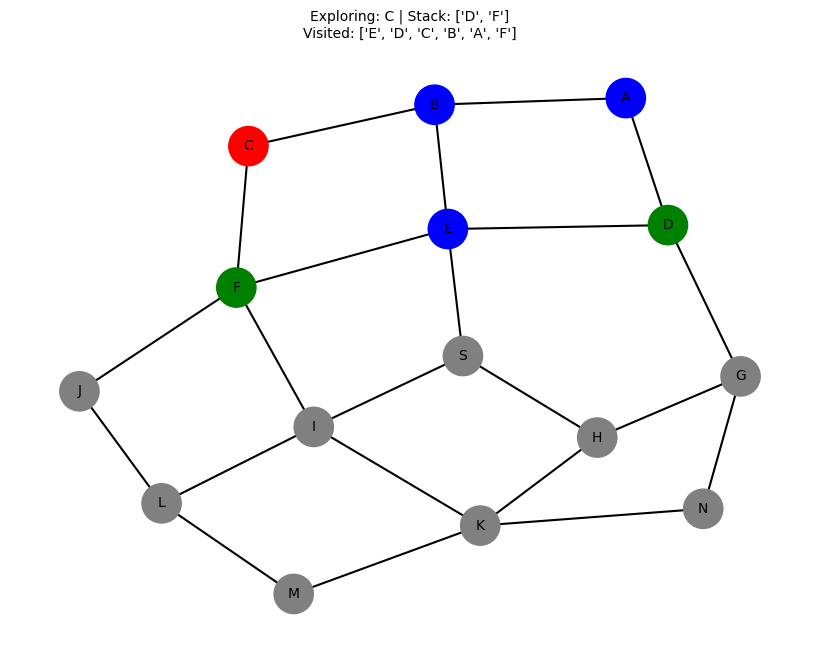

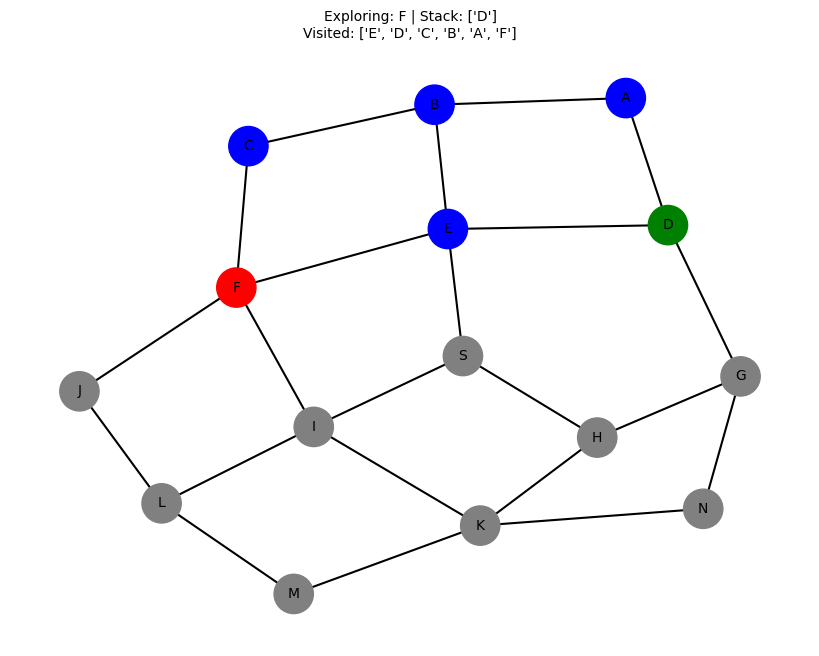

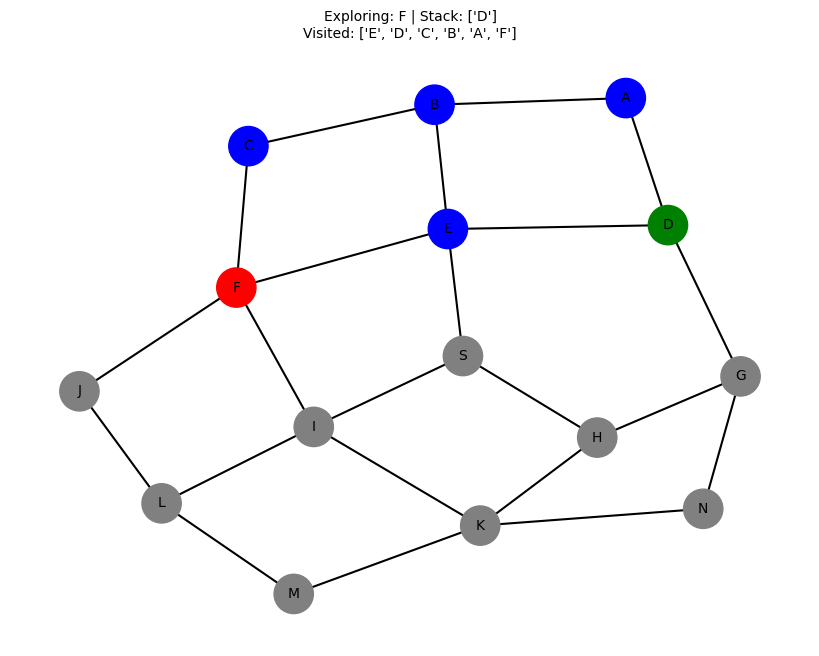

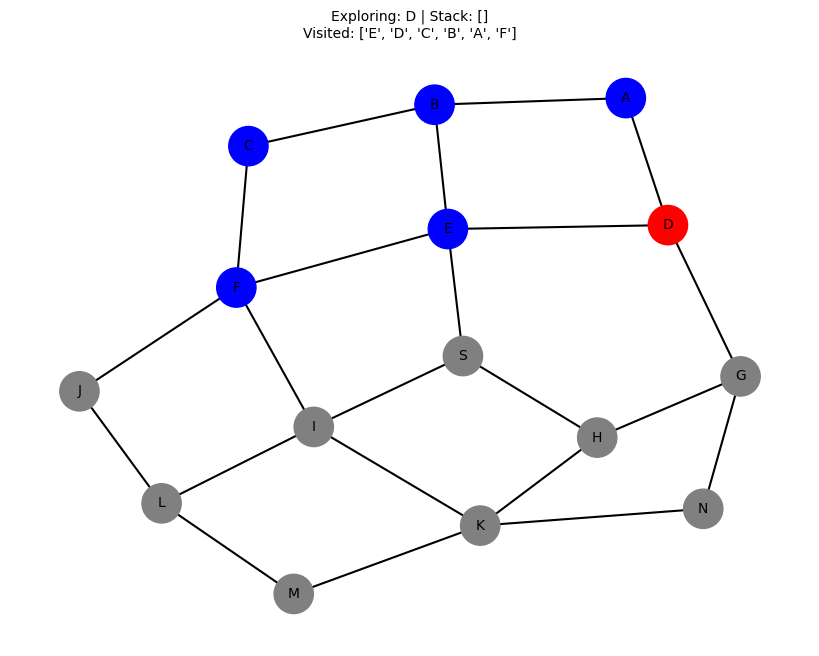

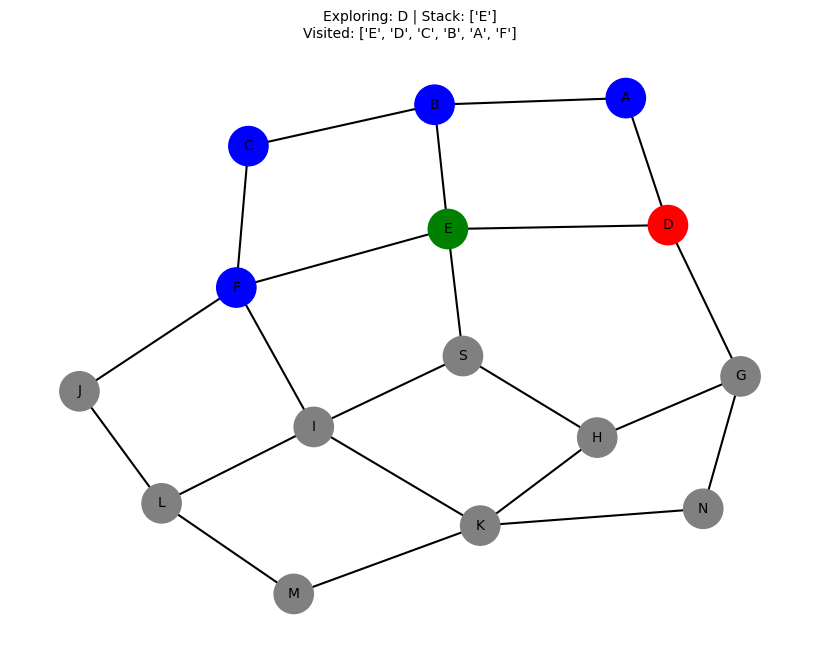

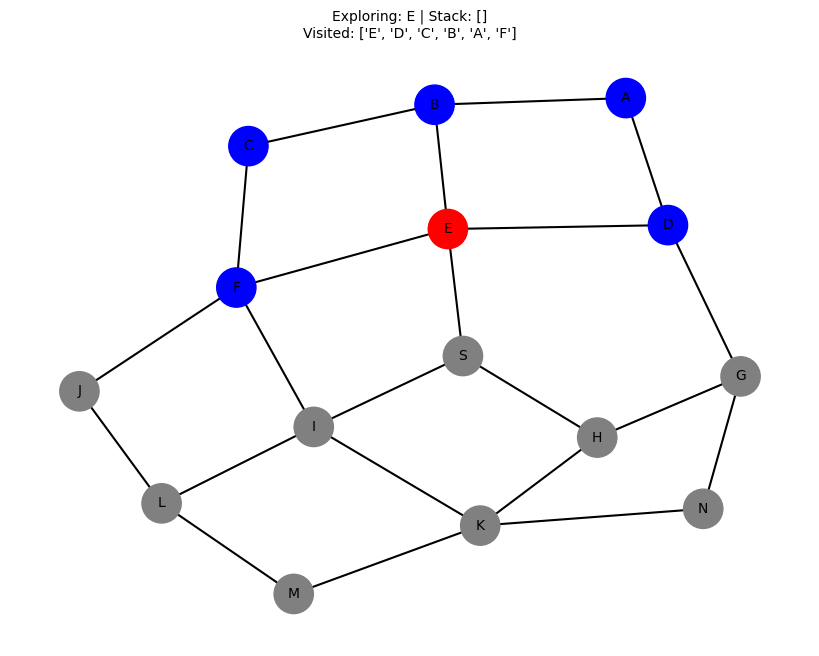

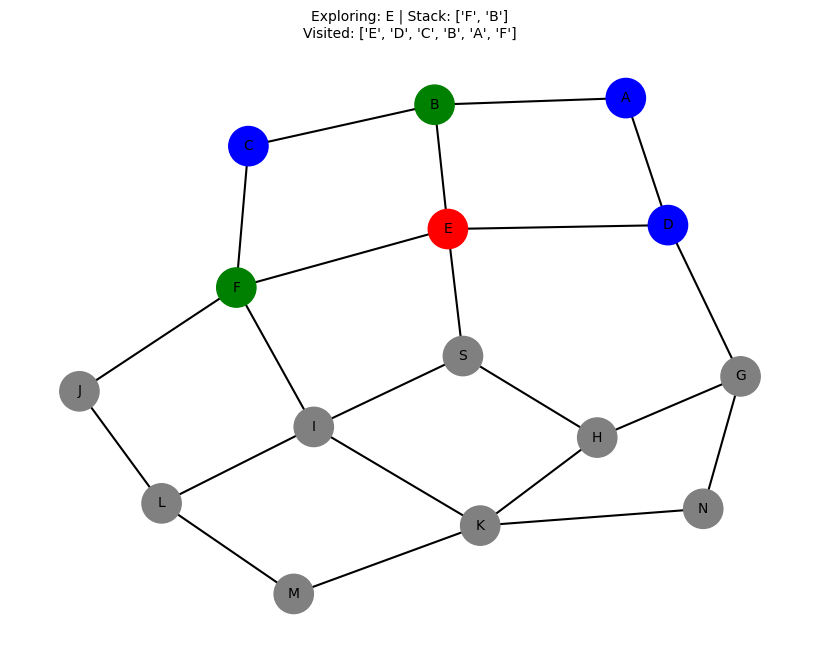

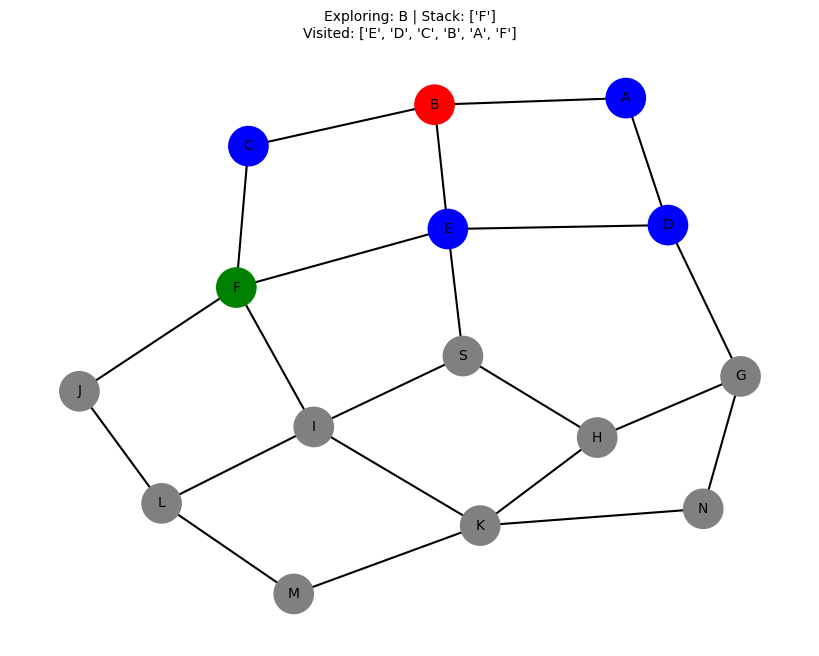

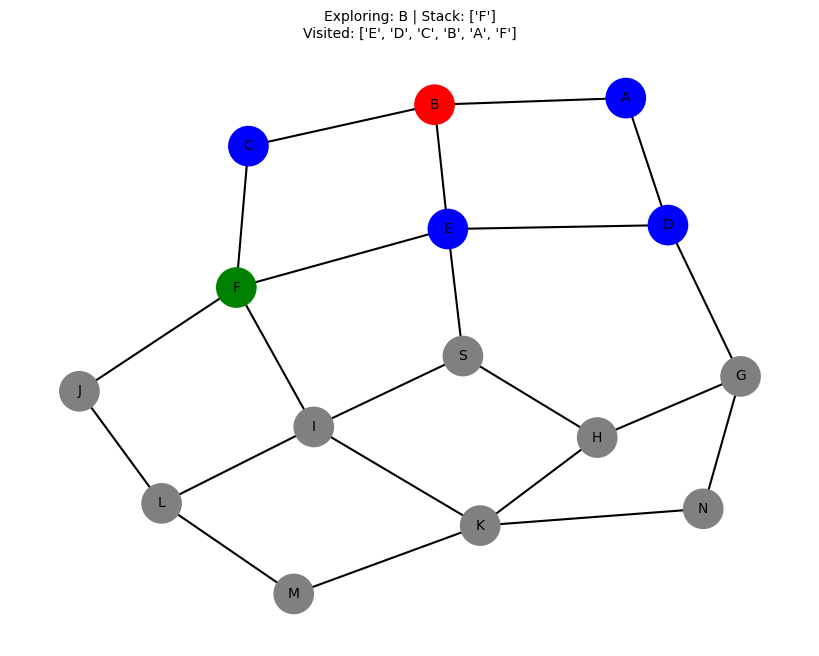

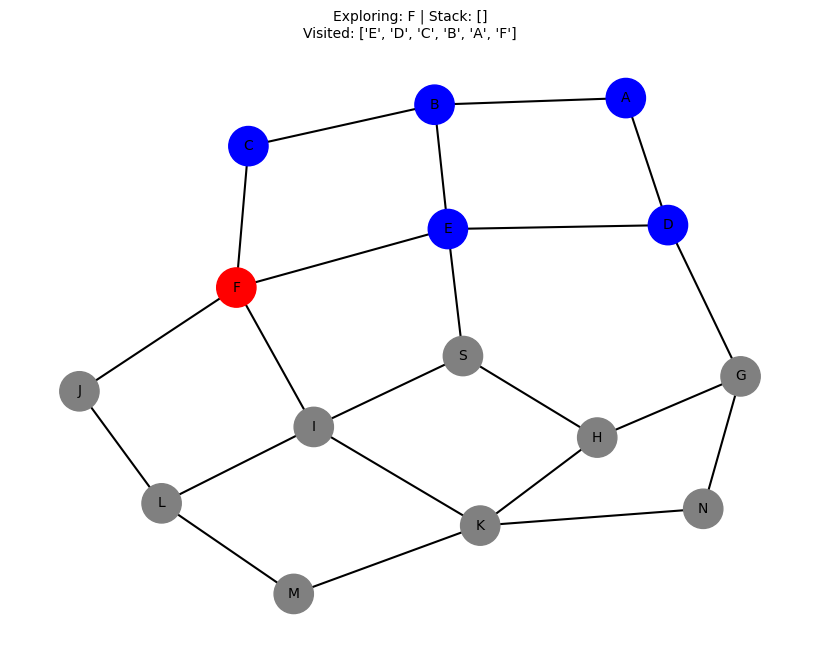

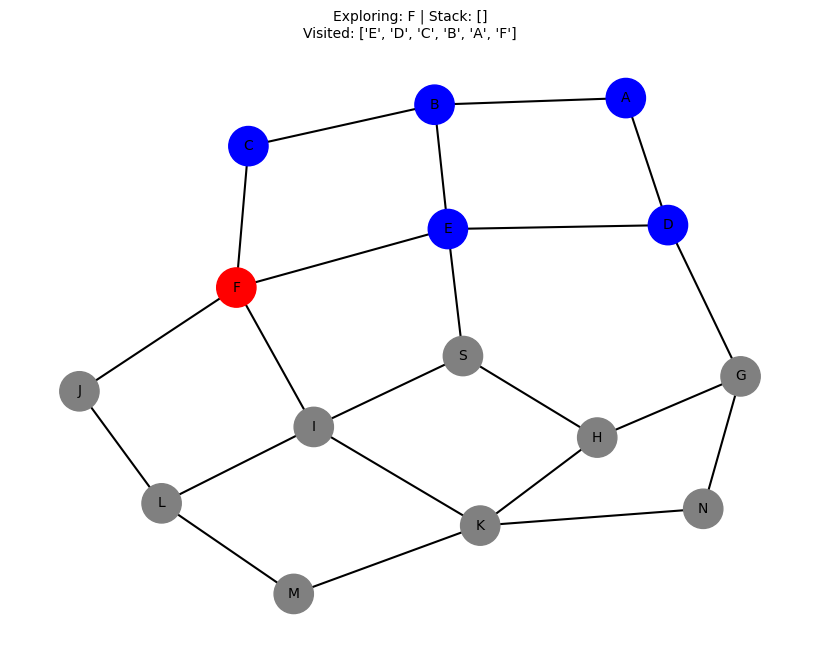


DLS Result: Failure (Goal not found within the depth limit)


In [18]:
# Define start, goal, and depth limit
start_node = "A"
goal_node = "H"
depth_limit = 3  # Adjust the depth limit

# Run Iterative DLS with Visualization
dls_result = iterative_depth_limited_search(graph, start_node, goal_node, depth_limit)

# Print the result
if dls_result == "Cutoff":
    print("\nDLS Result: Cutoff (Goal may be at a deeper level)")
elif dls_result is None:
    print("\nDLS Result: Failure (Goal not found within the depth limit)")
else:
    print("\nDLS Path Found:", " → ".join(dls_result))
